# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 11</center>

# <center>Machine Learning Pipeline</center>

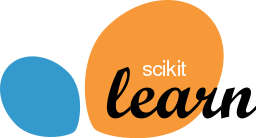

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Implement machine learning pipeline with sklearn and save pipeline model.

By the end of the lab, you should be able to :
- Implement preprocessing steps with machine learning pipeline.
    

- Train pipeline model
    
    
- Save model




## <font color = blue>1. Loading Data

    - Lets load Credit card dataset 
    
    
Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
    

In [94]:
#import libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [95]:
#Load datasets
columns = ["A1",'A2','A3','A4',"A5",'A6','A7','A8',"A9",'A10','A11','A12',"A13",'A14','A15','target']
df = pd.read_csv("creditcard.txt",names = columns)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## <font color = blue> 2. Data manipulation with pandas
    
- Convert special character into np.nan
    
    
    
- Ensure all the columns are in expected types.

In [96]:
df.replace("?",np.nan,inplace=True)
df.isna().sum()

A1        12
A2        12
A3         0
A4         6
A5         6
A6         9
A7         9
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14       13
A15        0
target     0
dtype: int64

In [97]:
df.dtypes

A1         object
A2         object
A3        float64
A4         object
A5         object
A6         object
A7         object
A8        float64
A9         object
A10        object
A11         int64
A12        object
A13        object
A14        object
A15         int64
target     object
dtype: object

In [98]:
df['A2'] = df['A2'].astype('float64')
df['A14'] = df['A14'].astype('float64')
df.dtypes

A1         object
A2        float64
A3        float64
A4         object
A5         object
A6         object
A7         object
A8        float64
A9         object
A10        object
A11         int64
A12        object
A13        object
A14       float64
A15         int64
target     object
dtype: object

## <font color = blue> 3. Split dataset


1.   Split the data to 80% training and 20% testing
2.   Get the Estimator (ML algorithm aka learner)

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`


In [99]:
from sklearn.model_selection import train_test_split

# Before splitting the data, lets choose any one feature as X
X = df.iloc[:,:-1]
y = df.target

#Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5,stratify=y)
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
49,b,23.92,0.665,u,g,c,v,0.165,f,f,0,f,g,100.0,0
74,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,160.0,2
245,b,33.17,3.040,y,p,c,h,2.040,t,t,1,t,g,180.0,18027
600,a,29.50,0.460,u,g,k,v,0.540,t,t,4,f,g,380.0,500
313,a,18.58,10.000,u,g,d,v,0.415,f,f,0,f,g,80.0,42


## <font color = blue> 4. Feature engineering with pipeline


In [100]:
#Pipeline is to create a sequence of preprocessing actions
from sklearn.pipeline import Pipeline

#SimpleImputer handles missing values
from sklearn.impute import SimpleImputer

#Standard Scaler normalise the numeric data so that large values does not
#create biasness in the training

#OneHotEndcoder converts categorical data to numerical, it also creates individual
#for each option in the categories
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [101]:
#Separate the Categorical and Numerical Columns
#Numeric columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

#categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], dtype='object')
Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], dtype='object')


###### `class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)`

`steps = list of (name,transform) tuple `

In [135]:
#Building the Numeric Transformation Pipeline
n_transformer = Pipeline(steps=
                       [
                           ('imputeN',SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())
                       ])

In [136]:
#Building the Numeric Transformation Pipeline
c_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('onehot',OneHotEncoder(handle_unknown='ignore'))
                       ])

`class sklearn.compose.ColumnTransformer(transformers, *, remainder='drop', 
sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False,
verbose_feature_names_out=True)`

`transformers: List of (name, transformer, columns) tuples specifying the 
transformer objects to be applied to subsets of the data.`

In [137]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=
                       [
                           ('numeric',n_transformer,numeric_cols),
                           ('categoric',c_transformer,categorical_cols)
                       ])

In [138]:
#Create estimator
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='kd_tree')

In [139]:
#add estimator to pipeline
mymodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',estimator)
                  ])

In [140]:
from sklearn import set_config
set_config(display='diagram')
mymodel.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], dtype='object'))])),
                ('est',
                 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3,
                                      weights='distance'))])

## <font color=blue> 5.Validation and Evaluation

In [141]:
#Import all the metrics for validation and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [142]:
#find y_hat for your test data

y_hat = mymodel.predict(X_test)

<AxesSubplot:>

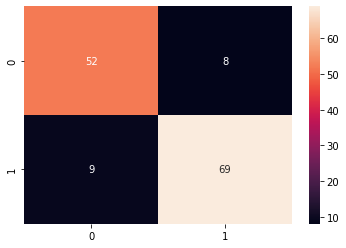

In [143]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_hat,y_test),annot=True)

In [144]:
#Summarise the fit of the model
report = classification_report(y_test, y_hat)
print("Report : \n{}".format(report))

Report : 
              precision    recall  f1-score   support

           +       0.87      0.85      0.86        61
           -       0.88      0.90      0.89        77

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138



## <font color=blue> 6. Make Prediction for unknown sample
    

In [145]:
sample = X_test.iloc[0:1,:]
sample

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
317,b,17.5,22.0,l,gg,ff,o,0.0,f,f,0,t,p,450.0,100000


In [146]:
mymodel.predict(sample)[0]

'+'

## <font color=blue> 7. Saving Machine Learning Model
    


In [147]:
import pickle
#save model 
pickle.dump(mymodel,open("mymodel.pkl","wb"))

In [148]:
#load model

model = pickle.load(open("mymodel.pkl","rb"))

In [149]:
model.score(X_test,y_test)

0.8768115942028986

## <font color=blue> 8. Hyperparamter Tuning
    
Note that we use automated process of tuning the hyperparameters of the estimator

1. Choose an estimator (KNeigborClassifier)
2. Check the documentation of that estimator for available hyperparameters for tuning
3. Use a list to generate different values of parameters
4. Use an automated process (GridSearchCV, RandomSearchCV) to hunt down the best model


In [153]:
from sklearn.model_selection import GridSearchCV

#Parameters to hypertune for KNeighborClassifier

n_neighbors_param = list(range(3,17,2))
# print(n_neighbors_param)
leaf_size_param = list(range(30,60,10))
weights_param = ['uniform', 'distance']
algorithm_param =['auto', 'ball_tree', 'kd_tree', 'brute']

#Pack these params into a dictionary

grid_params_knn = [
  {
    'est__n_neighbors' : n_neighbors_param,
    'est__leaf_size'   : leaf_size_param,  
    'est__weights'     : weights_param,
    'est__algorithm'   : algorithm_param,
  }
]

gs_knn_pipeline = GridSearchCV(estimator=mymodel,
                               param_grid = grid_params_knn,
                               scoring = 'accuracy',
                               cv = 10
                               )

#Fit the GridSearchCV to find the best model from the hyperparameter tuning
gs_models = gs_knn_pipeline.fit(X_train, y_train)

In [154]:
gs_models.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], dtype='object'))])),
                ('est', KNeighborsClassifier(n_neighbors=7))])

['+' '-' '-' '-' '-' '-' '-' '-' '+' '-' '-' '-' '-' '+' '+' '+' '+' '-'
 '+' '+' '+' '-' '-' '-' '-' '-' '-' '-' '-' '+' '-' '+' '+' '+' '-' '+'
 '+' '-' '-' '-' '-' '-' '-' '+' '-' '-' '-' '-' '+' '+' '-' '-' '-' '-'
 '-' '+' '-' '+' '-' '-' '-' '-' '+' '-' '+' '-' '-' '-' '+' '-' '-' '+'
 '+' '-' '-' '-' '+' '+' '+' '-' '-' '-' '+' '+' '+' '-' '-' '-' '-' '-'
 '-' '+' '+' '-' '+' '+' '-' '+' '-' '-' '-' '-' '+' '+' '-' '+' '+' '+'
 '+' '+' '-' '-' '+' '-' '-' '+' '+' '-' '-' '+' '+' '-' '+' '+' '+' '-'
 '+' '+' '+' '-' '-' '+' '+' '-' '-' '-' '+' '+']
Report : 
              precision    recall  f1-score   support

           Y       0.90      0.85      0.87        61
           N       0.89      0.92      0.90        77

    accuracy                           0.89       138
   macro avg       0.89      0.89      0.89       138
weighted avg       0.89      0.89      0.89       138



<AxesSubplot:>

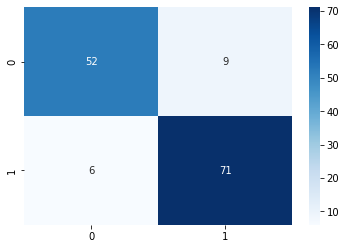

In [156]:
y_pred = gs_models.best_estimator_.predict(X_test)
print(y_pred)

#Summarise the fit of the model
report = classification_report(y_test, y_pred, target_names=['Y','N'])
print("Report : \n{}".format(report))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
sns.heatmap(cm,annot=True,cmap='Blues')

In [157]:
pickle.dump(gs_models.best_estimator_,open("gsmodel.pkl",'wb'))

In [158]:
gsmodel = pickle.load(open("gsmodel.pkl",'rb'))

In [159]:
gsmodel.predict(sample)

array(['+'], dtype=object)

# TODO Create Pipeline model for loan dataset following same procedure as above.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ldf = pd.read_csv('loan_train.csv')
ldf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
ldf.replace("?",np.nan,inplace=True)
ldf.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
ldf.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
from sklearn.model_selection import train_test_split

# Before splitting the data, lets choose any one feature as X
X = ldf.iloc[:,:-1]
y = ldf.Loan_Status

#Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5,stratify=y)
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban
502,LP002615,Male,Yes,2,Graduate,No,4865,5624.0,208.0,360.0,1.0,Semiurban
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban
316,LP002035,Male,Yes,2,Graduate,No,3717,0.0,120.0,360.0,1.0,Semiurban
524,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban


In [7]:
#Pipeline is to create a sequence of preprocessing actions
from sklearn.pipeline import Pipeline

#SimpleImputer handles missing values
from sklearn.impute import SimpleImputer

#Standard Scaler normalise the numeric data so that large values does not
#create biasness in the training

#OneHotEndcoder converts categorical data to numerical, it also creates individual
#for each option in the categories
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [8]:
#Separate the Categorical and Numerical Columns
#Numeric columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

#categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


In [9]:
#Building the Numeric Transformation Pipeline
n_transformer = Pipeline(steps=
                       [
                           ('imputeN',SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())
                       ])

In [10]:
#Building the Numeric Transformation Pipeline
c_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('onehot',OneHotEncoder(handle_unknown='ignore'))
                       ])

In [11]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=
                       [
                           ('numeric',n_transformer,numeric_cols),
                           ('categoric',c_transformer,categorical_cols)
                       ])

In [12]:
#Create estimator
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='kd_tree')

In [13]:
#add estimator to pipeline
mymodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',estimator)
                  ])

In [14]:
from sklearn import set_config
set_config(display='diagram')
mymodel.fit(X_train,y_train)

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object'))])),
                ('est',
                 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3,
                                      weights='distance'))])

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [16]:
y_hat = mymodel.predict(X_test)

<AxesSubplot:>

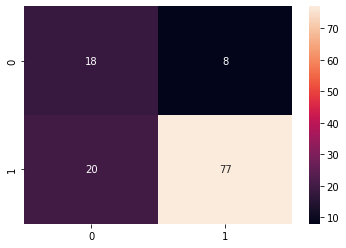

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_hat,y_test),annot=True)

In [18]:
#Summarise the fit of the model
report = classification_report(y_test, y_hat)
print("Report : \n{}".format(report))

Report : 
              precision    recall  f1-score   support

           N       0.69      0.47      0.56        38
           Y       0.79      0.91      0.85        85

    accuracy                           0.77       123
   macro avg       0.74      0.69      0.70       123
weighted avg       0.76      0.77      0.76       123



In [19]:
sample = X_test.iloc[0:1,:]
sample

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
414,LP002335,Female,Yes,0,Not Graduate,No,2149,3237.0,178.0,360.0,0.0,Semiurban


In [20]:
mymodel.predict(sample)[0]

'N'

In [21]:
import pickle
#save model 
pickle.dump(mymodel,open("mymodel.pkl","wb"))

In [22]:
#load model

model = pickle.load(open("mymodel.pkl","rb"))

In [23]:
model.score(X_test,y_test)

0.7723577235772358

In [24]:
from sklearn.model_selection import GridSearchCV

#Parameters to hypertune for KNeighborClassifier

n_neighbors_param = list(range(3,17,2))
# print(n_neighbors_param)
leaf_size_param = list(range(30,60,10))
weights_param = ['uniform', 'distance']
algorithm_param =['auto', 'ball_tree', 'kd_tree', 'brute']

#Pack these params into a dictionary

grid_params_knn = [
  {
    'est__n_neighbors' : n_neighbors_param,
    'est__leaf_size'   : leaf_size_param,  
    'est__weights'     : weights_param,
    'est__algorithm'   : algorithm_param,
  }
]

gs_knn_pipeline = GridSearchCV(estimator=mymodel,
                               param_grid = grid_params_knn,
                               scoring = 'accuracy',
                               cv = 10
                               )

#Fit the GridSearchCV to find the best model from the hyperparameter tuning
gs_models = gs_knn_pipeline.fit(X_train, y_train)

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Khams\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warni

In [25]:
gs_models.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object'))])),
                ('est',
                 KNeighborsClassifier(n_neighbors=9, weights='distance'))])

['N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']
Report : 
              precision    recall  f1-score   support

           Y       0.89      0.42      0.57        38
           N       0.79      0.98      0.87        85

    accuracy                           0.80       123
   macro avg       0.84      0.70      0.72       123
weighted avg       0.82      0.80      0.78       123



<AxesSubplot:>

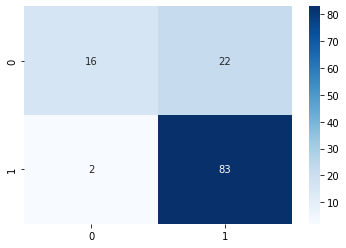

In [26]:
y_pred = gs_models.best_estimator_.predict(X_test)
print(y_pred)

#Summarise the fit of the model
report = classification_report(y_test, y_pred, target_names=['Y','N'])
print("Report : \n{}".format(report))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
sns.heatmap(cm,annot=True,cmap='Blues')

In [27]:
pickle.dump(gs_models.best_estimator_,open("gsmodel.pkl",'wb'))

In [28]:
gsmodel = pickle.load(open("gsmodel.pkl",'rb'))

In [29]:
gsmodel.predict(sample)

array(['N'], dtype=object)